In [1]:
using Plots, IntervalArithmetic, Serialization, LaTeXStrings

In [2]:
setprecision(8192)
function enlarge(x::Interval{BigFloat})
    isguaranteed(x) || error("interval is not guaranteed")
    return interval(BigFloat(inf(x), RoundDown), BigFloat(sup(x), RoundUp))
end

enlarge (generic function with 1 method)

In [3]:
k = interval(4)
g(x, y, k, n) = (x + y - k)/sqrt(n)/interval(2)

g (generic function with 1 method)

In [4]:
f(x) = -x + sqrt(interval(1) + x^2)

f (generic function with 1 method)

In [5]:
c⁺ = I"1.025"
c⁻ = I"0.987"

[0.986999, 0.987001]_com

In [6]:
B⁻(n) = sqrt(n/interval(3))*c⁻

B⁻ (generic function with 1 method)

In [7]:
B⁺(n) = sqrt(n/interval(3))*c⁺

B⁺ (generic function with 1 method)

In [8]:
N₁ = 9000000
while true
    b1 = sqrt(interval(12)+(-sqrt(interval(3)/interval(N₁))*k+c⁺*(sqrt(interval(1)-interval(1)/interval(N₁))+sqrt(interval(1)+interval(1)/interval(N₁))))^2)-interval(2)*c⁺-interval(2)*c⁻
    b2 = interval(2)*c⁺-(sqrt(interval(12)+(interval(2)*c⁻)^2)+sqrt(interval(3)/interval(N₁))*k-c⁻*(sqrt(interval(1)-interval(1)/interval(N₁))+sqrt(interval(1)+interval(1)/interval(N₁))))
    if inf(b1)>0 && inf(b2)>0
        break
    else
        N₁ *=2
    end
end
    

In [9]:
b⁻ = B⁻.(interval.(collect(1:N₁)))
b⁺ = B⁺.(interval.(collect(1:N₁)));

In [10]:
Sb⁻ = f.(g.(vcat(interval(0.0),b⁻[1:N₁-1]), vcat(b⁻[2:N₁], B⁻(interval(N₁+1))), k, interval.(collect(1:N₁)))).*sqrt.(interval.(1:N₁))
Sb⁺ = f.(g.(vcat(interval(0.0),b⁺[1:N₁-1]), vcat(b⁺[2:N₁], B⁺(interval(N₁+1))), k, interval.(collect(1:N₁)))).*sqrt.(interval.(1:N₁));

In [11]:
N₂ = argmax(cumsum((inf.(b⁺-Sb⁻).<=0) .||(inf.(Sb⁺-b⁻).<=0)))

9215

In [12]:
setprecision(8192*8)
b₁ = deserialize("b1_k4")
b₀ = interval(BigFloat, 0.0)
b = zeros(Interval{BigFloat},40001)
b[1:2] = [b₀, b₁]
for n = 2:40000
    b[n+1] = k+(interval(BigFloat, n-1)/b[n])-b[n]-b[n-1]
end
b = b[2:end];

In [13]:
N = sum((inf.(b⁺[1:N₂]-b[1:N₂]).<=0) .|| (inf.(b[1:N₂]-b⁻[1:N₂]).<=0))
if all(((inf.(b⁺[1:N₂]-b[1:N₂]).>0) .&& (inf.(b[1:N₂]-b⁻[1:N₂]).>0))[N+1:end])
    println("N = "*string(N)*" checked")
end

N = 2186 checked


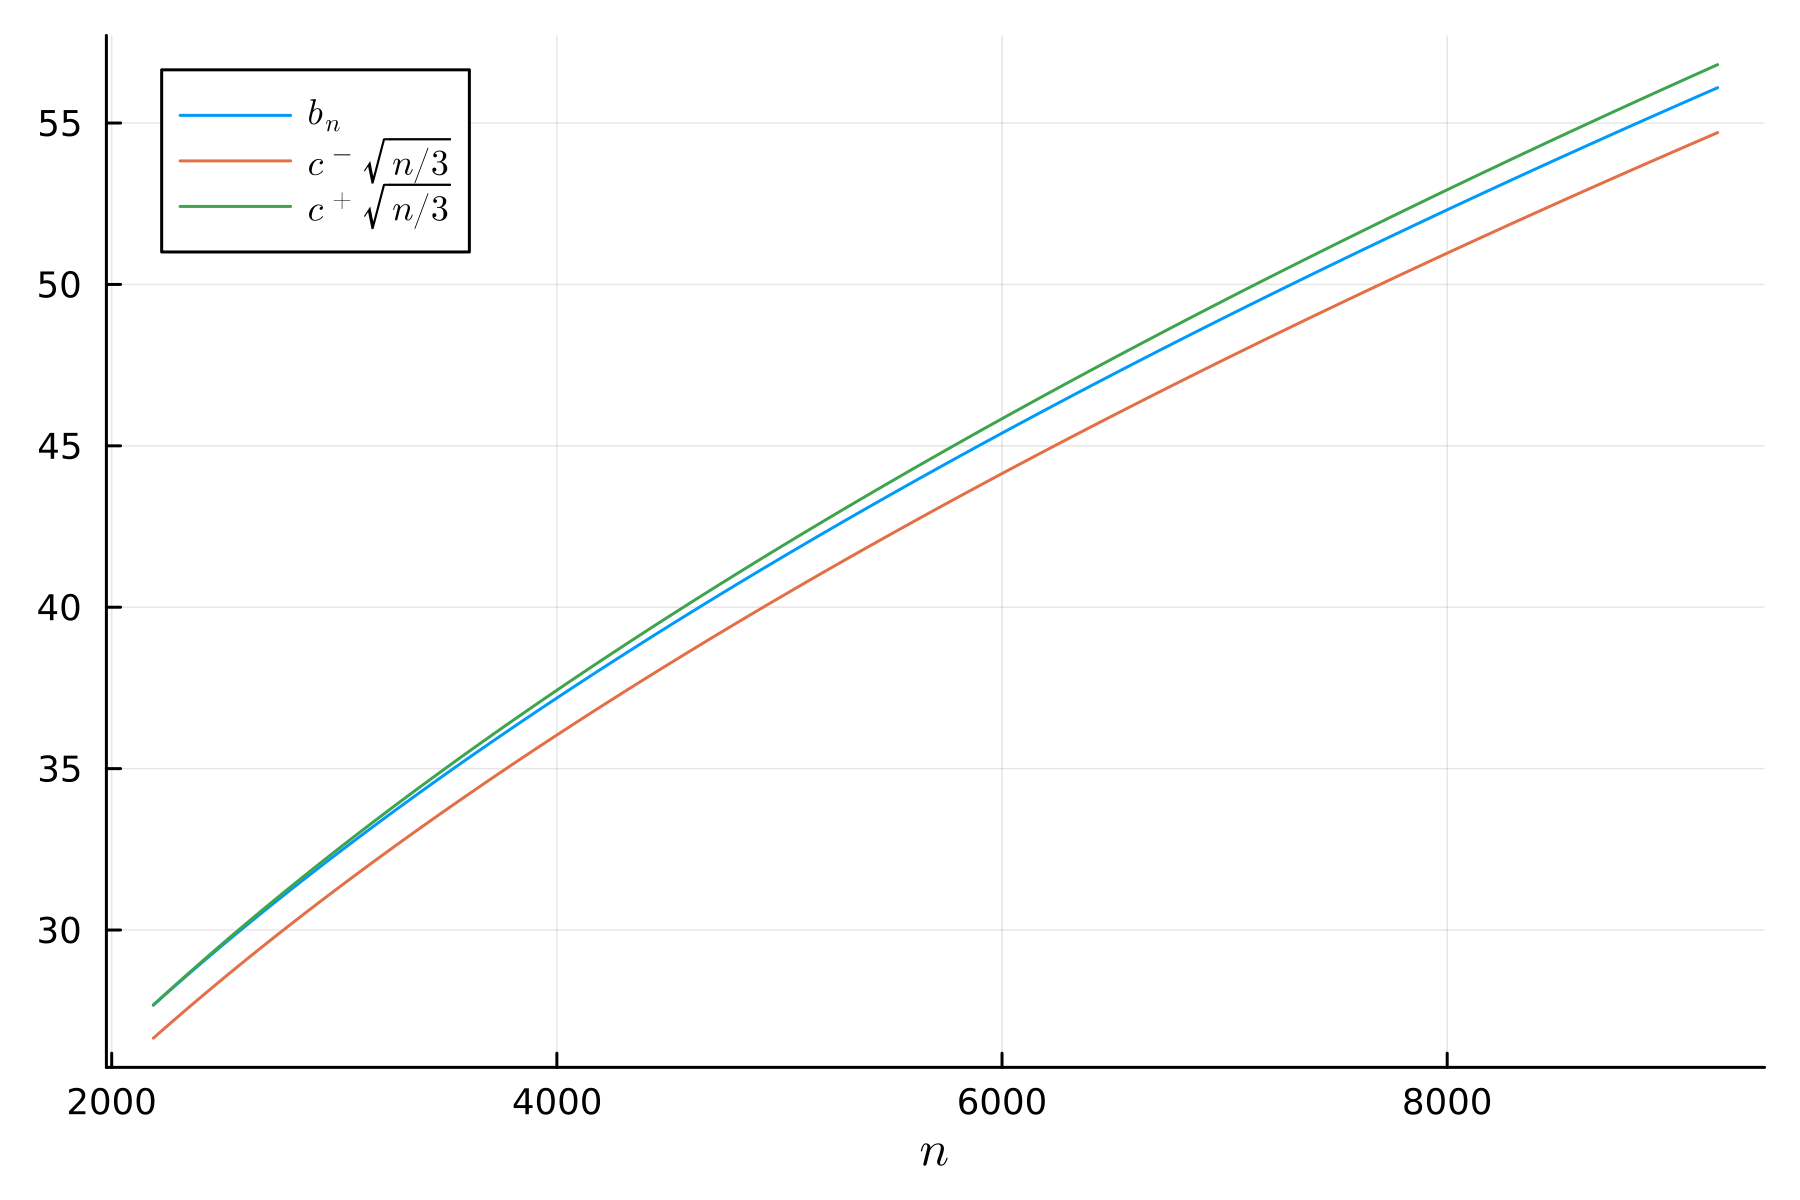

In [14]:
plot(N+1:N₂,Float64.(mid.(b[N+1:N₂])), label = L"b_n", dpi = 300)
plot!(N+1:N₂,sup.(b⁻[N+1:N₂]), label = L"c^-\sqrt{n/3}", xlabel= L"n", xformatter=:plain)
plot!(N+1:N₂,inf.(b⁺[N+1:N₂]), label = L"c^+\sqrt{n/3}")

In [15]:
png("actual_bounds")

"actual_bounds.png"

In [16]:
N₃ = argmax(cumsum((inf.(b⁺-Sb⁻).<=0) .||(inf.(Sb⁺-b⁻).<=0)))
while sum((inf.(b⁺-Sb⁻).<=0) .||(inf.(Sb⁺-b⁻).<=0)) >0
    for i in N₃:-1:1
        while inf(b⁺[i]-Sb⁻[i]) <= 0.0
            b⁺[i] *= I"1.01"
        end
    end
    Sb⁺ = f.(g.(vcat(interval(0.0),b⁺[1:N₁-1]), vcat(b⁺[2:N₁], B⁺(interval(N₁+1))), k, interval.(collect(1:N₁)))).*sqrt.(interval.(1:N₁));
    N₃ = argmax(cumsum((inf.(b⁺-Sb⁻).<=0) .||(inf.(Sb⁺-b⁻).<=0)))
    for i in N₃:-1:1
        while inf(Sb⁺[i]-b⁻[i]) <= 0.0
            b⁻[i] *= I"0.999"
        end
    end
    Sb⁻ = f.(g.(vcat(interval(0.0),b⁻[1:N₁-1]), vcat(b⁻[2:N₁], B⁻(interval(N₁+1))), k, interval.(collect(1:N₁)))).*sqrt.(interval.(1:N₁))
    N₃ = argmax(cumsum((inf.(b⁺-Sb⁻).<=0) .||(inf.(Sb⁺-b⁻).<=0)))
end

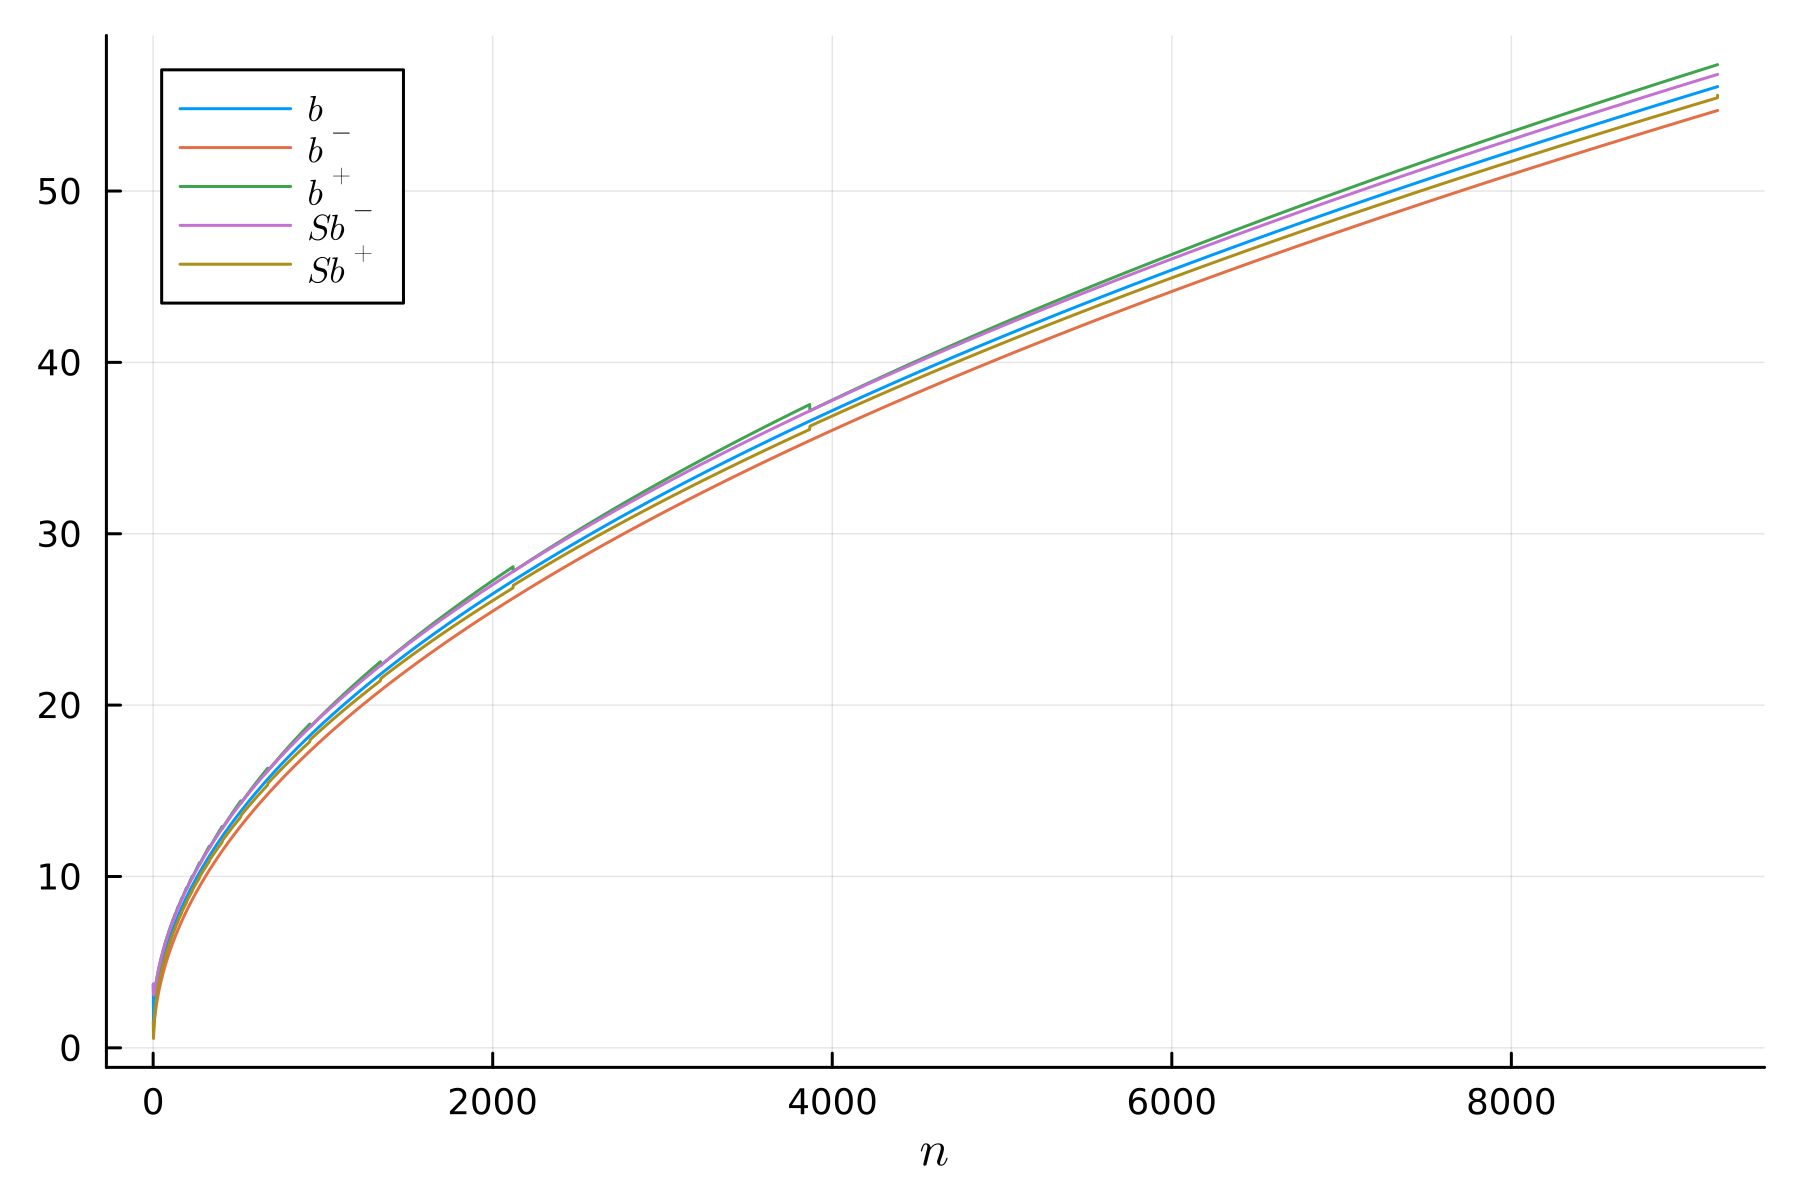

In [17]:
m = 1
M = N₂
plot(m:M, mid.(b[m:M]), label = L"b")
plot!(m:M, sup.(b⁻)[m:M], label = L"b^-", xlabel= L"n", xformatter=:plain, dpi = 300)
plot!(m:M, inf.(b⁺)[m:M], label = L"b^+")
plot!(m:M, sup.(Sb⁻)[m:M], label = L"Sb^-")
plot!(m:M, inf.(Sb⁺)[m:M], label = L"Sb^+")

In [18]:
png("inflation_construction")

"inflation_construction.png"

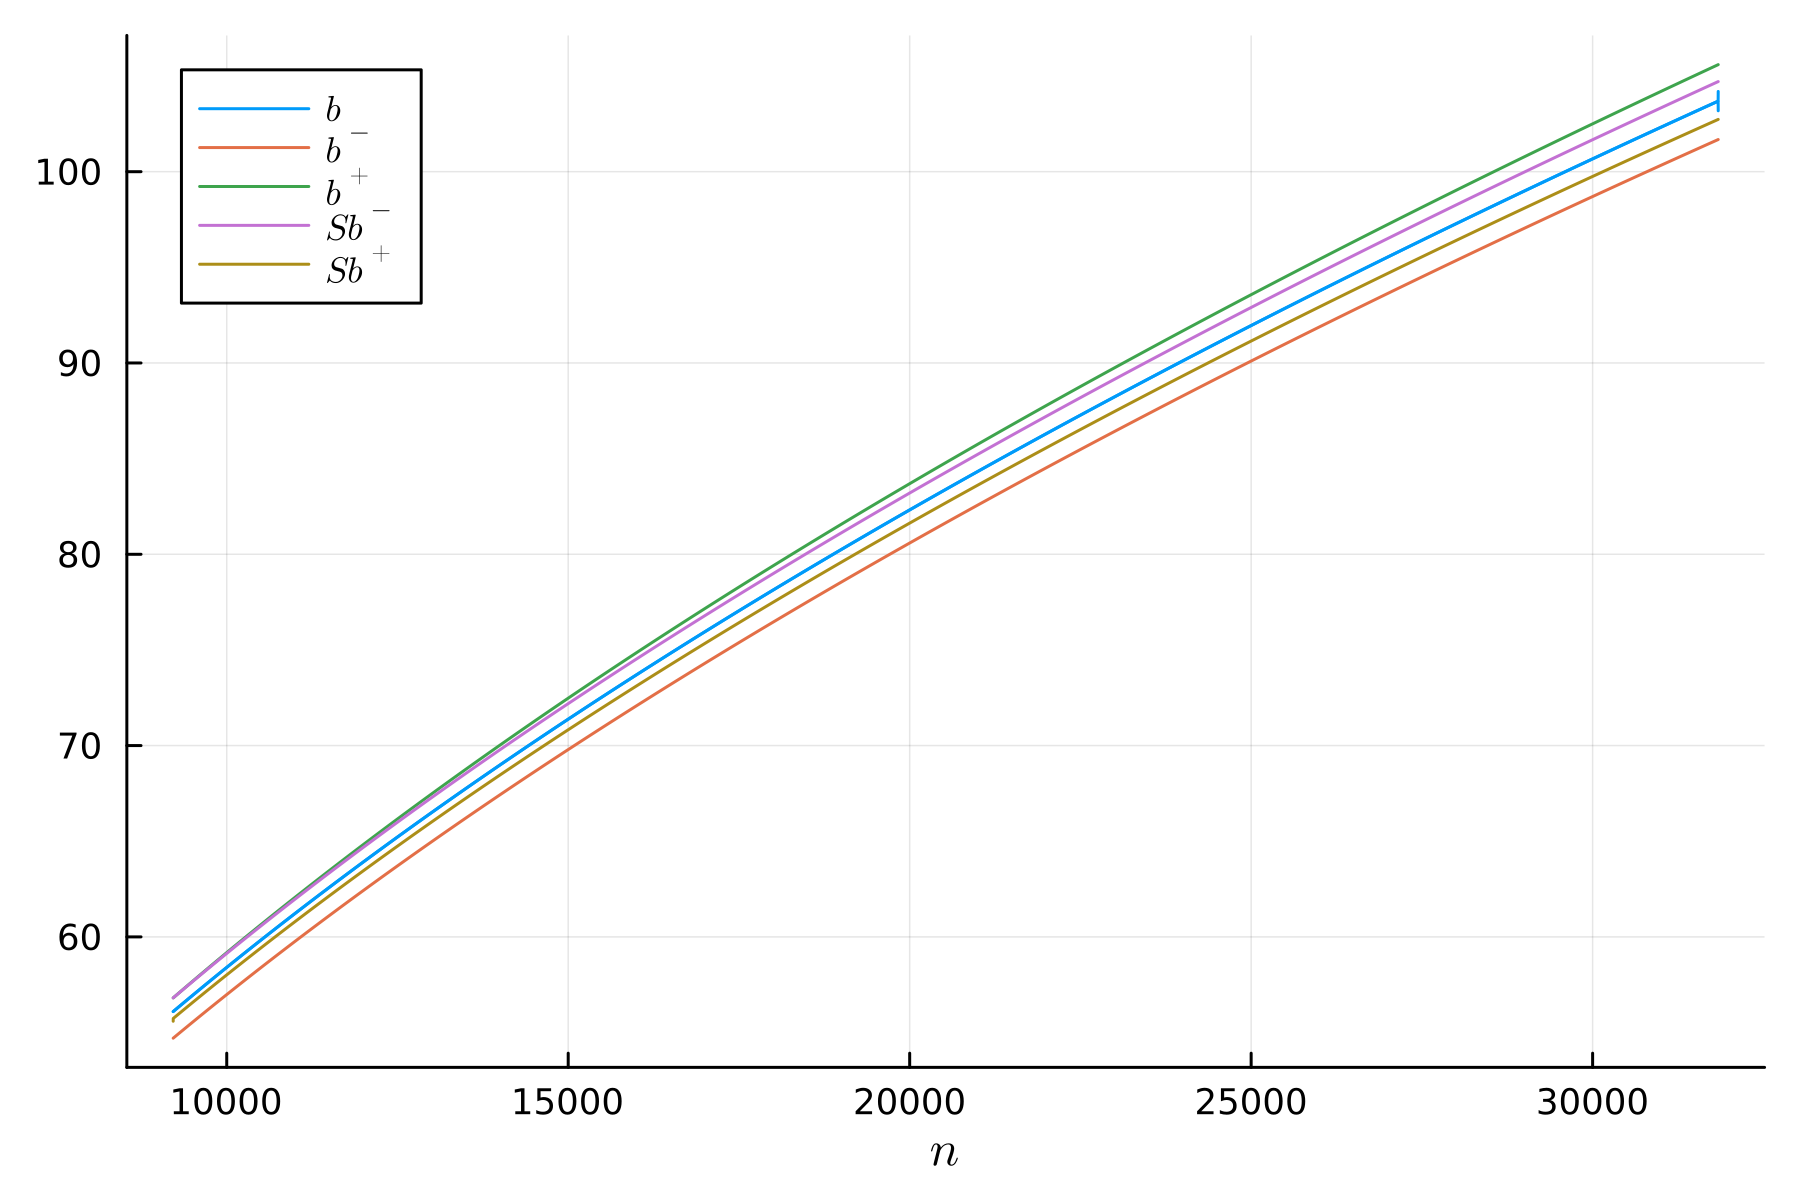

In [19]:
m = N₂+1
M = 31839
plot(m:M, inf.(b[m:M]), label = L"b", dpi = 300)
plot!(m:M, sup.(b⁻)[m:M], label = L"b^-", xlabel= L"n", xformatter=:plain)
plot!(m:M, inf.(b⁺)[m:M], label = L"b^+")
plot!(m:M, sup.(Sb⁻)[m:M], label = L"Sb^-")
plot!(m:M, inf.(Sb⁺)[m:M], label = L"Sb^+")
plot!(m:M, sup.(b[m:M]), label = false, color = 1)

In [20]:
C_α = interval(3)^interval(1//4)/sqrt(c⁺)
θ = c⁺^2*interval((1+1//N)*(1+2//N))^interval(1//4)/interval(3)

[0.350328, 0.350329]_com

In [21]:
serialize("C_alpha", C_α)
serialize("theta", θ)